##### **CSCI218 Foundation to Artifical Intelligence Project**

*CSCI218 - FT - T02 T04 T05*\
**Group 23 - 07/02/2025**

1. Rohit Panda (8943060)
2. Tan Jun Rong, Dillon (9093187)
3. Yeonjeong Lee (8876368)
4. Karissa Angeline Ramos Wong (8877889)
5. Naga Maheeth Sreekantom(7770200)
6. Russel Hendro Yudo (8496663)

# ***Information on Dataset***

## **Import Libraries**

In [ ]:
!pip install tensorflow==2.12.0

In [ ]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd
import pickle
from sklearn.svm import SVC
# Importing  tools for visualization
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import time
# Import evaluation metric libraries
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report

# Word Cloud library
from wordcloud import WordCloud, STOPWORDS
from sklearn.utils import class_weight
# Library used for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
# Import model selection libraries
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.feature_extraction.text import TfidfVectorizer

# Library used for ML Model implementation
from sklearn.naive_bayes import MultinomialNB

# Importing the Pipeline class from scikit-learn
from sklearn.pipeline import Pipeline

from tensorflow import keras
from tensorflow.keras.layers import Bidirectional, LSTM, Dense, Embedding, Input, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#from tensorflow.keras.mixed_precision import experimental as mixed_precision # Original line causing error
from tensorflow.keras import mixed_precision # Import directly

policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy) # Use set_global_policy instead of set_policy

# Import the SimpleImputer class for handling missing values
from sklearn.impute import SimpleImputer
# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## **Data Loading**

Download and Upload [selected dataset](https://drive.google.com/drive/folders/1_GRI_dqcNjZ0MUsTGVNOnrVWJ-rWYv8T?usp=sharing) with `files.upload()` function.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving enron_spam_data.csv to enron_spam_data.csv


## **Dataset View of Data**

In [ ]:
import pandas as pd

# Load data file
dataset = pd.read_csv('/content/enron_spam_data.csv')
dataset

,Message ID,Subject,Message,Spam/Ham,Date
0,0,christmas tree farm pictures,NaN,ham,1999-12-10
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14
...,...,...,...,...,...
33711,33711,= ? iso - 8859 - 1 ? q ? good _ news _ c = eda...,"hello , welcome to gigapharm onlinne shop .\np...",spam,2005-07-29
33712,33712,all prescript medicines are on special . to be...,i got it earlier than expected and it was wrap...,spam,2005-07-29
33713,33713,the next generation online pharmacy .,are you ready to rock on ? let the man in you ...,spam,2005-07-30
33714,33714,bloow in 5 - 10 times the time,learn how to last 5 - 10 times longer in\nbed ...,spam,2005-07-30


## **Dataset Rows & Columns count**

In [ ]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",dataset.shape[0])
print("Number of columns are: ",dataset.shape[1])

Number of rows are:  33716
Number of columns are:  5


## **Dataset Information**

In [ ]:
# Dataset Info
# Checking information about the dataset using info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33716 entries, 0 to 33715
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Message ID  33716 non-null  int64 
 1   Subject     33427 non-null  object
 2   Message     33345 non-null  object
 3   Spam/Ham    33716 non-null  object
 4   Date        33716 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.3+ MB


### **Duplicate Values**

In [ ]:
# Dataset Duplicate Value Count
dup = dataset.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


### **Missing Values/Null Values Count**

In [ ]:
# Missing Values/Null Values Count
dataset.isnull().sum()

,0
Message ID,0
Subject,289
Message,371
Spam/Ham,0
Date,0


# ***Understanding the Dataset***

In [ ]:
# Dataset Columns
dataset.columns

Index(['Message ID', 'Subject', 'Message', 'Spam/Ham', 'Date'], dtype='object')

In [ ]:
# Dataset Describe (all columns included)
dataset.describe(include= 'all').round(2)

,Message ID,Subject,Message,Spam/Ham,Date
count,33716.00,33427,33345,33716,33716
unique,NaN,24206,29779,2,1527
top,NaN,schedule crawler : hourahead failure,click here to be removed\n,spam,2005-07-19
freq,NaN,185,65,17171,457
mean,16857.50,NaN,NaN,NaN,NaN
std,9733.12,NaN,NaN,NaN,NaN
min,0.00,NaN,NaN,NaN,NaN
25%,8428.75,NaN,NaN,NaN,NaN
50%,16857.50,NaN,NaN,NaN,NaN
75%,25286.25,NaN,NaN,NaN,NaN


### **Check Unique Values for each variable.**

In [ ]:
# Check Unique Values for each variable using a for loop.
for i in dataset.columns.tolist():
  print("No. of unique values in",i,"is",dataset[i].nunique())

No. of unique values in Message ID is 33716
No. of unique values in Subject is 24206
No. of unique values in Message is 29779
No. of unique values in Spam/Ham is 2
No. of unique values in Date is 1527


# ***Data Preprocessing***

In [ ]:
# Rename columns if needed - assuming original column names don't match desired names
dataset.rename(columns={"Message ID": "ID",
                       "Spam/Ham": "Category"}, inplace=True)

# Create a binary 'Spam' column: 1 for 'spam' and 0 for 'ham', based on the 'Category' column
dataset['Spam'] = dataset['Category'].apply(lambda x: 1 if x == 'spam' else 0)

# Updated new dataset
dataset.head()

,ID,Subject,Message,Category,Date,Spam
0,0,christmas tree farm pictures,NaN,ham,1999-12-10,0
1,1,"vastar resources , inc .","gary , production from the high island larger ...",ham,1999-12-13,0
2,2,calpine daily gas nomination,- calpine daily gas nomination 1 . doc,ham,1999-12-14,0
3,3,re : issue,fyi - see note below - already done .\nstella\...,ham,1999-12-14,0
4,4,meter 7268 nov allocation,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham,1999-12-14,0


# ***Data Vizualization with charts***

### Chart-1: Distribution of Spam vs Ham

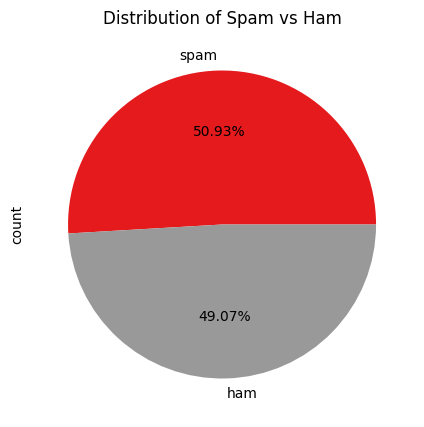

In [ ]:
# Chart - 1 Pie Chart Visualization Code For Distribution of Spam vs Ham Messages
spread = dataset['Category'].value_counts()
plt.rcParams['figure.figsize'] = (5,5)

# Set Labels
spread.plot(kind = 'pie', autopct='%1.2f%%', cmap='Set1')
plt.title(f'Distribution of Spam vs Ham')

# Display the Chart
plt.show()

### Chart-2: Most Used Words in Spam Messages

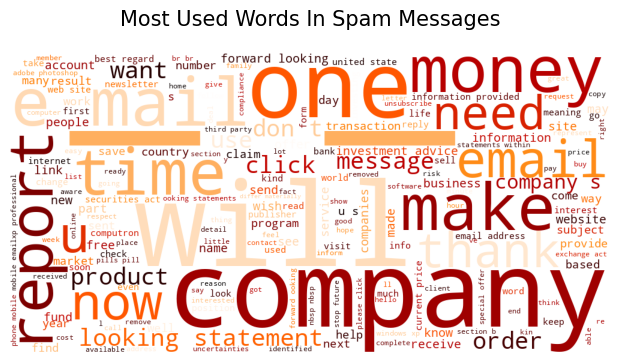

In [ ]:
# Splitting Spam Messages
df_spam = dataset[dataset['Category']=='spam'].copy()

# Chart - 2 WordCloud Plot Visualization Code For Most Used Words in Spam Messages
# Create a String to Store All The Words
comment_words = ''

# Remove The Stopwords
stopwords = set(STOPWORDS)

# Iterate Through The Column
for val in df_spam.Message:

    # Typecaste Each Val to String
    val = str(val)

    # Split The Value
    tokens = val.split()

    # Converts Each Token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

# Set Parameters
wordcloud = WordCloud(width = 1000, height = 500,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10,
                max_words = 1000,
                colormap = 'gist_heat_r').generate(comment_words)

# Set Labels
plt.figure(figsize = (6,6), facecolor = None)
plt.title('Most Used Words In Spam Messages', fontsize = 15, pad=20)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

# Display Chart
plt.show()

## ***Feature Engineering***

### Splitting the data to train and test

In [ ]:
# Create an instance of SimpleImputer to replace NaN values with an empty string
imputer = SimpleImputer(strategy='constant', fill_value='')

# Calculate Message Length and Length Bin before train_test_split
# Impute missing values in the 'Message' column before calculating length
# dataset['Message'] = imputer.fit_transform(dataset[['Message']]) # Original line causing error
dataset['Message'] = imputer.fit_transform(dataset[['Message']]).ravel() # Impute missing values and flatten the output
dataset['Message'] = dataset['Message'].astype(str) # Convert to string after imputation
dataset['Message_Length'] = dataset['Message'].apply(len)
dataset['Length_Bin'] = pd.qcut(dataset['Message_Length'], q=8, labels=False)  # 5 bins # This line creates the 'Length_Bin' column

# Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(
       dataset.Message, dataset.Spam, test_size=0.35, stratify=dataset.Length_Bin, random_state=42
)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 21915
Test set size: 11801


# ***ML Model Implementation***


## **ML Model: Multinomial Naive Bayes**



### **Getting the TF-IDF Vectorizer and saving it**

Naïve Bayes Model Performance:
Train Accuracy: 0.9906000456308465
Test Accuracy: 0.9864418269638167
Test ROC AUC: 0.9864225492183488

Classification Report (Test):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5808
           1       0.99      0.99      0.99      5993

    accuracy                           0.99     11801
   macro avg       0.99      0.99      0.99     11801
weighted avg       0.99      0.99      0.99     11801



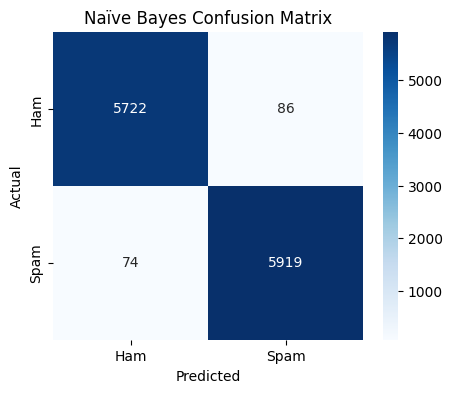

In [ ]:
# Train a TF-IDF vectorizer on X_train and transform both train and test data
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Train the Multinomial Naïve Bayes classifier
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)

# Evaluate the model
y_pred_train = nb_model.predict(X_train_tfidf)
y_pred_test = nb_model.predict(X_test_tfidf)

print("Naïve Bayes Model Performance:")
print("Train Accuracy:", accuracy_score(y_train, y_pred_train))
print("Test Accuracy:", accuracy_score(y_test, y_pred_test))
print("Test ROC AUC:", roc_auc_score(y_test, y_pred_test))
print("\nClassification Report (Test):")
print(classification_report(y_test, y_pred_test))

# Plot confusion matrix for test set
cm = confusion_matrix(y_test, y_pred_test)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naïve Bayes Confusion Matrix")
plt.show()


In [ ]:
# Save the TF-IDF vectorizer and the Naïve Bayes model
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(tfidf_vectorizer, f)
with open('naive_bayes.pkl', 'wb') as f:
    pickle.dump(nb_model, f)

# Download the saved files (if needed)
from google.colab import files
files.download('vectorizer.pkl')
files.download('naive_bayes.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Create an instance of SimpleImputer to replace NaN values with an empty string
imputer = SimpleImputer(strategy='constant', fill_value='')

# Calculate Message Length and Length Bin before train_test_split
# Impute missing values in the 'Message' column before calculating length
# dataset['Message'] = imputer.fit_transform(dataset[['Message']]) # Impute missing values  # Original line causing error
dataset['Message'] = imputer.fit_transform(dataset[['Message']]).ravel() # Impute missing values and flatten the output
dataset['Message'] = dataset['Message'].astype(str) # Convert to string after imputation
dataset['Message_Length'] = dataset['Message'].apply(len)
dataset['Length_Bin'] = pd.qcut(dataset['Message_Length'], q=8, labels=False)  # 5 bins

# Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(
       dataset.Message, dataset.Spam, test_size=0.35, stratify=dataset.Length_Bin, random_state=42
)

# Initialize the MultinomialNB classifier
clf = MultinomialNB()

# Create a pipeline with CountVectorizer and the MultinomialNB classifier
model = Pipeline([
    ('vectorizer', CountVectorizer()),  # Text feature extraction
    ('clf', clf)  # Your MultinomialNB classifier
])



# Apply the imputer to fill missing values in X_train and X_test
# Convert X_train and X_test to NumPy arrays before reshaping
X_train = imputer.fit_transform(X_train.values.reshape(-1, 1)).ravel() # Reshape for SimpleImputer and flatten
X_test = imputer.transform(X_test.values.reshape(-1, 1)).ravel()  # Reshape for SimpleImputer and flatten

# No need to reshape back since we flattened the output
# X_train = X_train.flatten() # This line is no longer needed
# X_test = X_test.flatten() # This line is no longer needed

In [ ]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    '''The function will take model, x train, x test, y train, y test
    and then it will fit the model, then make predictions on the trained model,
    it will then print roc-auc score of train and test, then plot the roc, auc curve,
    print confusion matrix for train and test, then print classification report for train and test,
    then plot the feature importances if the model has feature importances,
    and finally it will return the following scores as a list:
    recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test
    '''

    # Perform cross-validation
    cv_results = cross_validate(model, X_train, y_train, cv=5,
                                 scoring=['accuracy', 'neg_log_loss'],
                                 return_train_score=True)

    # Extract training and validation scores
    train_accuracy = cv_results['train_accuracy']
    val_accuracy = cv_results['test_accuracy']
    train_loss = -cv_results['train_neg_log_loss']  # Negate to get actual loss
    val_loss = -cv_results['test_neg_log_loss']    # Negate to get actual loss

    # Plot training and validation curves
    def plot_training_history(train_accuracy, val_accuracy, train_loss, val_loss):
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(train_accuracy, label='Training Accuracy')
        plt.plot(val_accuracy, label='Validation Accuracy')
        plt.xlabel('Cross-Validation Fold')
        plt.ylabel('Accuracy')
        plt.title('Training and Validation Accuracy')
        plt.legend()

        plt.subplot(1, 2, 2)
        plt.plot(train_loss, label='Training Loss')
        plt.plot(val_loss, label='Validation Loss')
        plt.xlabel('Cross-Validation Fold')
        plt.ylabel('Loss')
        plt.title('Training and Validation Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    # Call the function to plot the curves
    plot_training_history(train_accuracy, val_accuracy, train_loss, val_loss)

    # fit the model on the training data
    model.fit(X_train, y_train)

    # Load the saved vectorizer
    with open('vectorizer.pkl', 'rb') as file:
        loaded_vectorizer = pickle.load(file)

    # Transform training and testing data
    X_train_tfidf = loaded_vectorizer.transform(X_train)  # Transform original X_train
    X_test_tfidf = loaded_vectorizer.transform(X_test)    # Transform original X_test

    # Train Naïve Bayes Model using the transformed data
    naive_bayes_model = MultinomialNB()
    naive_bayes_model.fit(X_train_tfidf, y_train) # Use original y_train


    # make predictions on the test data
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    pred_prob_train = model.predict_proba(X_train)[:,1]
    pred_prob_test = model.predict_proba(X_test)[:,1]

    # calculate ROC AUC score
    roc_auc_train = roc_auc_score(y_train, y_pred_train)
    roc_auc_test = roc_auc_score(y_test, y_pred_test)
    print("\nTrain ROC AUC:", roc_auc_train)
    print("Test ROC AUC:", roc_auc_test)

    # plot the ROC curve
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, pred_prob_train)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, pred_prob_test)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr_train, tpr_train, label="Train ROC AUC: {:.2f}".format(roc_auc_train))
    plt.plot(fpr_test, tpr_test, label="Test ROC AUC: {:.2f}".format(roc_auc_test))
    plt.legend()
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

    # calculate confusion matrix
    cm_train = confusion_matrix(y_train, y_pred_train)
    cm_test = confusion_matrix(y_test, y_pred_test)

    fig, ax = plt.subplots(1, 2, figsize=(11,4))

    print("\nConfusion Matrix:")
    sns.heatmap(cm_train, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[0])
    ax[0].set_xlabel("Predicted Label")
    ax[0].set_ylabel("True Label")
    ax[0].set_title("Train Confusion Matrix")

    sns.heatmap(cm_test, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'], cmap="Oranges", fmt='.4g', ax=ax[1])
    ax[1].set_xlabel("Predicted Label")
    ax[1].set_ylabel("True Label")
    ax[1].set_title("Test Confusion Matrix")

    plt.tight_layout()
    plt.show()


    # calculate classification report
    cr_train = classification_report(y_train, y_pred_train, output_dict=True)
    cr_test = classification_report(y_test, y_pred_test, output_dict=True)
    print("\nTrain Classification Report:")
    crt = pd.DataFrame(cr_train).T
    print(crt.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_train).T.iloc[:, :-1], annot=True, cmap="Blues")
    print("\nTest Classification Report:")
    crt2 = pd.DataFrame(cr_test).T
    print(crt2.to_markdown())
    # sns.heatmap(pd.DataFrame(cr_test).T.iloc[:, :-1], annot=True, cmap="Blues")


    precision_train = cr_train['weighted avg']['precision']
    precision_test = cr_test['weighted avg']['precision']

    recall_train = cr_train['weighted avg']['recall']
    recall_test = cr_test['weighted avg']['recall']

    acc_train = accuracy_score(y_true = y_train, y_pred = y_pred_train)
    acc_test = accuracy_score(y_true = y_test, y_pred = y_pred_test)

    F1_train = cr_train['weighted avg']['f1-score']
    F1_test = cr_test['weighted avg']['f1-score']

    model_score = [precision_train, precision_test, recall_train, recall_test, acc_train, acc_test, roc_auc_train, roc_auc_test, F1_train, F1_test ]
    return model_score

### Explain the ML Model Evaluation metric Score Chart

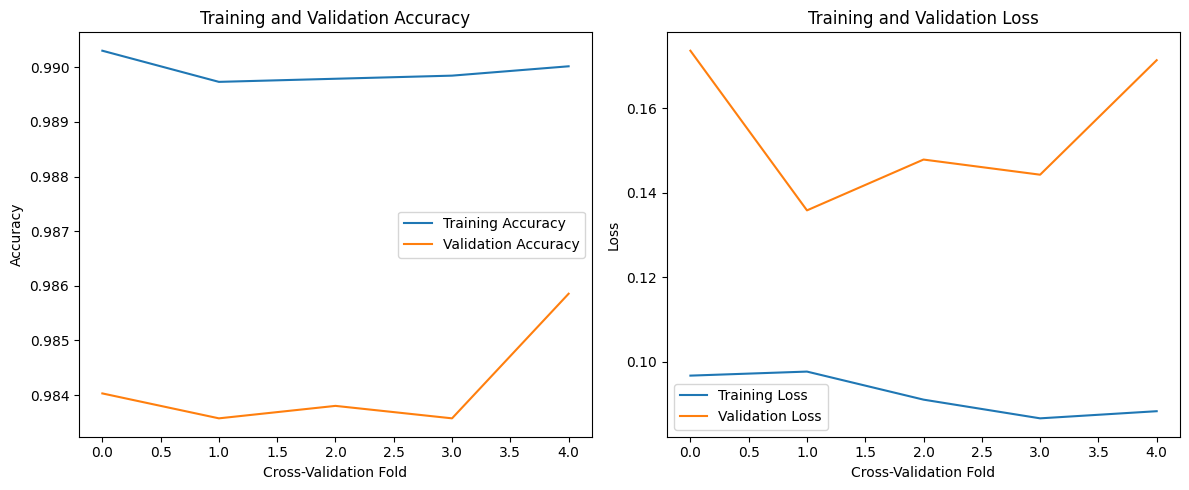


Train ROC AUC: 0.9896771769238373
Test ROC AUC: 0.985801329742367


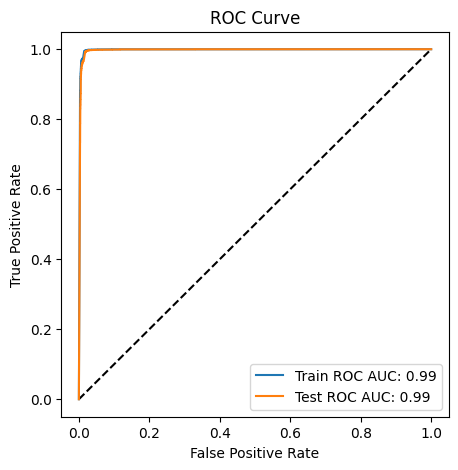


Confusion Matrix:


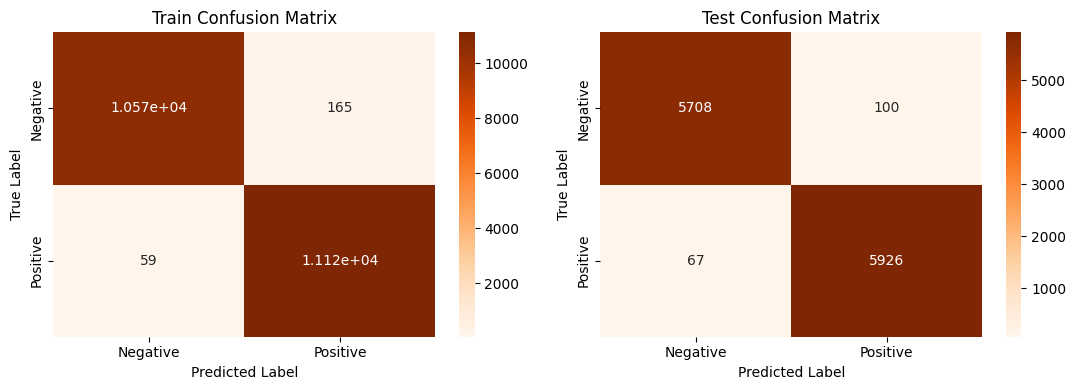


Train Classification Report:
|              |   precision |   recall |   f1-score |      support |
|:-------------|------------:|---------:|-----------:|-------------:|
| 0            |    0.99445  | 0.984633 |   0.989517 | 10737        |
| 1            |    0.985378 | 0.994722 |   0.990028 | 11178        |
| accuracy     |    0.989779 | 0.989779 |   0.989779 |     0.989779 |
| macro avg    |    0.989914 | 0.989677 |   0.989772 | 21915        |
| weighted avg |    0.989823 | 0.989779 |   0.989777 | 21915        |

Test Classification Report:
|              |   precision |   recall |   f1-score |      support |
|:-------------|------------:|---------:|-----------:|-------------:|
| 0            |    0.988398 | 0.982782 |   0.985582 |  5808        |
| 1            |    0.983405 | 0.98882  |   0.986105 |  5993        |
| accuracy     |    0.985849 | 0.985849 |   0.985849 |     0.985849 |
| macro avg    |    0.985902 | 0.985801 |   0.985844 | 11801        |
| weighted avg |    0.985863 | 

In [ ]:
# Visualizing evaluation Metric Score chart
MultinomialNB_score = evaluate_model(model, X_train, X_test, y_train, y_test)

### **Saving and Downloading the ML Model**

In [ ]:
from google.colab import files
# After training your model (clf)
# Save the model to a file
with open('naive_bayes.pkl', 'wb') as model_file:
    pickle.dump(clf, model_file)


# Download the saved model file
files.download('naive_bayes.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **ML Model: LSTM Model**

### **Data Preparation**

In [ ]:
# ---------------------------------------------------------------------------------
# 1. Data Preparation
# ---------------------------------------------------------------------------------
# Assume X_train, X_test, y_train, y_test are already defined.
# y_train, y_test must be binary labels: 0 = ham, 1 = spam

max_words = 10000      # Maximum vocabulary size
max_length = 100       # Maximum sequence length to pad/truncate
embedding_dim = 128    # Dimension of embedding vectors

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq  = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_length)
X_test_pad  = pad_sequences(X_test_seq, maxlen=max_length)

### **Build LSTM Model**

In [ ]:
# ---------------------------------------------------------------------------------
# 2. Build the LSTM Model (Single Sigmoid Output)
# ---------------------------------------------------------------------------------
inputs = Input(shape=(max_length,))
x = Embedding(input_dim=max_words, output_dim=embedding_dim)(inputs)
x = Bidirectional(LSTM(32, return_sequences=False, dropout=0.3))(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(1, activation='sigmoid')(x)

lstm_model = Model(inputs=inputs, outputs=outputs)

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
lstm_model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
lstm_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 100)]             0         
                                                                 
 embedding (Embedding)       (None, 100, 128)          1280000   
                                                                 
 bidirectional (Bidirectiona  (None, 64)               41216     
 l)                                                              
                                                                 
 dense (Dense)               (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                             

### **Implement Class Weights**

In [ ]:
# ---------------------------------------------------------------------------------
# 3. (Optional) Class Weights
# ---------------------------------------------------------------------------------
weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(weights))
print("Computed Class Weights:", class_weights)

Computed Class Weights: {0: 1.020536462699078, 1: 0.9802737520128825}


### **Stop Early of Epoch Training**

In [ ]:
# ---------------------------------------------------------------------------------
# 4. EarlyStopping Callback
# ---------------------------------------------------------------------------------
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

### **Training Steps of the LSTM Model**

#### **Define a Callback to Measure Epoch Time**

In [ ]:

# ---------------------------------------------------------------------------------
# 1. Define a Callback to Measure Epoch Time
# ---------------------------------------------------------------------------------
class TimingCallback(tf.keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs=None):
        self.epoch_start_time = time.time()

    def on_epoch_end(self, epoch, logs=None):
        elapsed = time.time() - self.epoch_start_time
        print(f"Epoch {epoch+1} took {elapsed:.2f} seconds")

timing_callback = TimingCallback()

#### **Train the LSTM Model**

In [ ]:
# ---------------------------------------------------------------------------------
# 2. Train the LSTM Model
# ---------------------------------------------------------------------------------
history = lstm_model.fit(
    X_train_pad, y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_test_pad, y_test),
    class_weight=class_weights,  # If you want to apply computed class weights
    callbacks=[timing_callback, callback]  # 'callback' might be EarlyStopping
)


Epoch 1/10
343/343 [==============================] - 1210s 4s/step - loss: 0.4767 - accuracy: 0.8057 - val_loss: 0.1352 - val_accuracy: 0.9597
Epoch 2/10
343/343 [==============================] - 1191s 3s/step - loss: 0.1098 - accuracy: 0.9661 - val_loss: 0.0794 - val_accuracy: 0.9731
Epoch 3/10
343/343 [==============================] - 1228s 4s/step - loss: 0.0678 - accuracy: 0.9797 - val_loss: 0.0671 - val_accuracy: 0.9782
Epoch 4/10
343/343 [==============================] - 1289s 4s/step - loss: 0.0490 - accuracy: 0.9850 - val_loss: 0.0614 - val_accuracy: 0.9806
Epoch 5/10
343/343 [==============================] - 1294s 4s/step - loss: 0.0380 - accuracy: 0.9880 - val_loss: 0.0573 - val_accuracy: 0.9809
Epoch 6/10
343/343 [==============================] - 1271s 4s/step - loss: 0.0324 - accuracy: 0.9898 - val_loss: 0.0582 - val_accuracy: 0.9814
Epoch 7/10
343/343 [==============================] - 1295s 4s/step - loss: 0.0265 - accuracy: 0.9917 - val_loss: 0.0610 - val_accuracy:

#### **Plot Training and Validation Curves by Epoch**

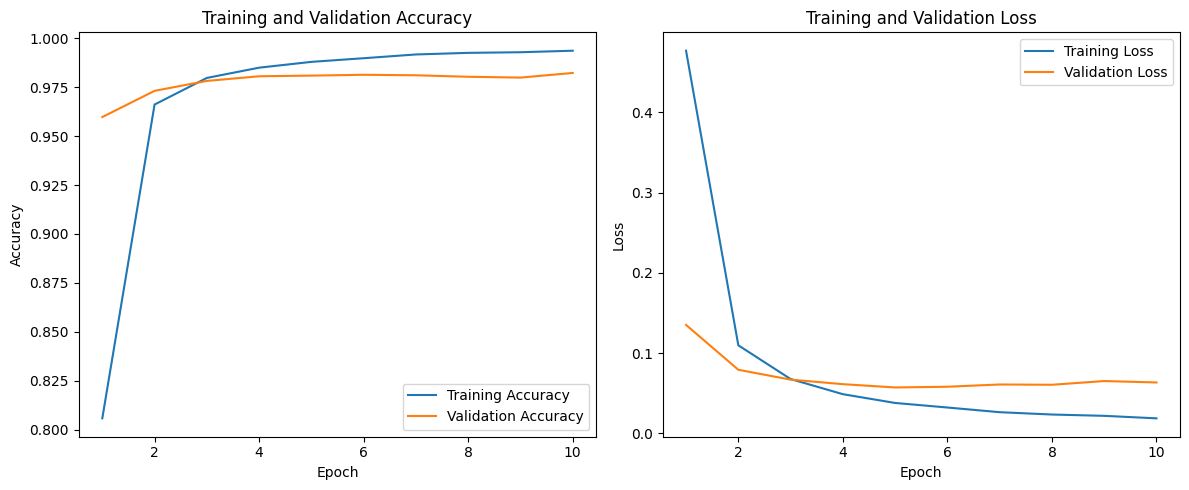

In [ ]:
# ---------------------------------------------------------------------------------
# 3. Plot Training and Validation Curves by Epoch
# ---------------------------------------------------------------------------------
def plot_training_history(history):
    """
    Plots training & validation accuracy and loss from the Keras history object.
    """
    train_accuracy = history.history['accuracy']
    val_accuracy   = history.history['val_accuracy']
    train_loss     = history.history['loss']
    val_loss       = history.history['val_loss']

    epochs = range(1, len(train_accuracy) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy subplot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_accuracy, label='Training Accuracy')
    plt.plot(epochs, val_accuracy, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.legend()

    # Loss subplot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_loss, label='Training Loss')
    plt.plot(epochs, val_loss, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Call the plotting function
plot_training_history(history)

### **Download Tokenizer**

In [ ]:
import pickle

# Save the tokenizer to a file named "lstm_tokenizer.pkl"
with open("lstm_tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)
from google.colab import files
files.download("lstm_tokenizer.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### **Evaluate with Different Thresholds**

369/369 [==============================] - 178s 482ms/step

--- Evaluation at Threshold = 0.5 ---
Accuracy: 0.9809338191678671
ROC AUC: 0.9975894598565176
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      5808
           1       0.97      0.99      0.98      5993

    accuracy                           0.98     11801
   macro avg       0.98      0.98      0.98     11801
weighted avg       0.98      0.98      0.98     11801



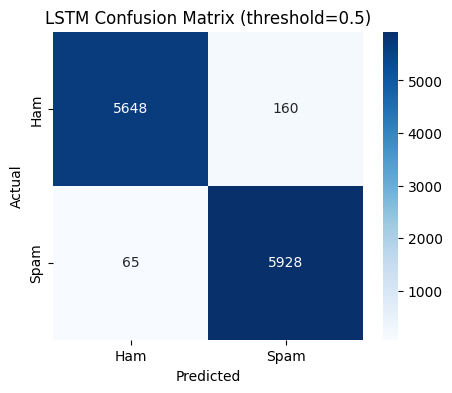


--- Evaluation at Threshold = 0.6 ---
Accuracy: 0.9815269892382001
ROC AUC: 0.9975894598565176
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      5808
           1       0.98      0.99      0.98      5993

    accuracy                           0.98     11801
   macro avg       0.98      0.98      0.98     11801
weighted avg       0.98      0.98      0.98     11801



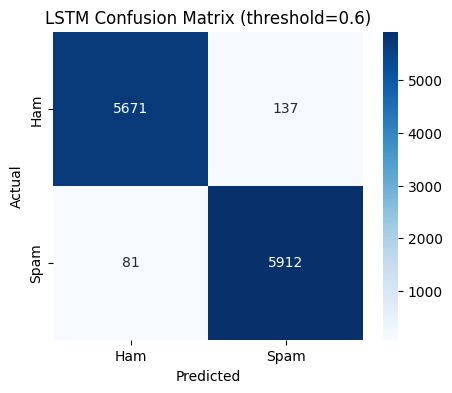

In [ ]:

# ---------------------------------------------------------------------------------
# 6. Evaluate with Different Thresholds
# ---------------------------------------------------------------------------------
y_pred_prob = lstm_model.predict(X_test_pad)

threshold_1 = 0.5
y_pred_05 = (y_pred_prob >= threshold_1).astype(int)

print(f"\n--- Evaluation at Threshold = {threshold_1} ---")
print("Accuracy:", accuracy_score(y_test, y_pred_05))
print("ROC AUC:", roc_auc_score(y_test, y_pred_prob.flatten()))
print("Classification Report:")
print(classification_report(y_test, y_pred_05))

cm_05 = confusion_matrix(y_test, y_pred_05)
plt.figure(figsize=(5,4))
sns.heatmap(cm_05, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"LSTM Confusion Matrix (threshold={threshold_1})")
plt.show()

threshold_2 = 0.6
y_pred_06 = (y_pred_prob >= threshold_2).astype(int)

print(f"\n--- Evaluation at Threshold = {threshold_2} ---")
print("Accuracy:", accuracy_score(y_test, y_pred_06))
print("ROC AUC:", roc_auc_score(y_test, y_pred_prob.flatten()))
print("Classification Report:")
print(classification_report(y_test, y_pred_06))

cm_06 = confusion_matrix(y_test, y_pred_06)
plt.figure(figsize=(5,4))
sns.heatmap(cm_06, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"LSTM Confusion Matrix (threshold={threshold_2})")
plt.show()

### **Plot Distribution of Predicted Probabilities**

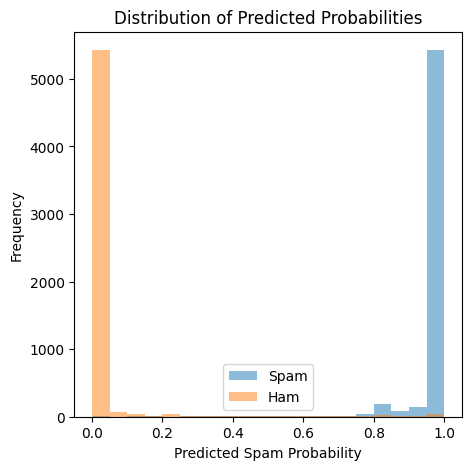

Average spam probability for true spam emails: 0.974
Average spam probability for true ham emails: 0.03128


In [ ]:

# ---------------------------------------------------------------------------------
# 7. Plot Distribution of Predicted Probabilities
# ---------------------------------------------------------------------------------
spam_probs = y_pred_prob[y_test == 1]
ham_probs  = y_pred_prob[y_test == 0]

plt.hist(spam_probs, bins=20, alpha=0.5, label='Spam')
plt.hist(ham_probs, bins=20, alpha=0.5, label='Ham')
plt.xlabel("Predicted Spam Probability")
plt.ylabel("Frequency")
plt.legend()
plt.title("Distribution of Predicted Probabilities")
plt.show()

print("Average spam probability for true spam emails:", np.mean(spam_probs))
print("Average spam probability for true ham emails:", np.mean(ham_probs))

In [ ]:
# ---------------------------------------------------------------------------------
# 8. Save the Model
# ---------------------------------------------------------------------------------
with open("lstm_tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

lstm_model.save("lstm_model.h5")

# (Optional) Download the files if running in Colab
# from google.colab import files
# files.download("lstm_tokenizer.pkl")
files.download("lstm_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **ML Model: Random Forest Model**

### **Feature Extraction using TF–IDF**

### **Train the Random Forest Classifier**

In [ ]:
# ---------------------------
# 2. Feature Extraction using TF–IDF
# ---------------------------
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [ ]:
# ---------------------------
# 3. Train Random Forest
# ---------------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)

RandomForestClassifier(random_state=42)

### **Evaluate the Model**

Train Classification Report:
|              |   precision |   recall |   f1-score |      support |
|:-------------|------------:|---------:|-----------:|-------------:|
| 0            |    1        | 0.996833 |   0.998414 | 10737        |
| 1            |    0.996968 | 1        |   0.998481 | 11178        |
| accuracy     |    0.998449 | 0.998449 |   0.998449 |     0.998449 |
| macro avg    |    0.998484 | 0.998417 |   0.998448 | 21915        |
| weighted avg |    0.998453 | 0.998449 |   0.998448 | 21915        |

Test Classification Report:
|              |   precision |   recall |   f1-score |      support |
|:-------------|------------:|---------:|-----------:|-------------:|
| 0            |    0.98854  | 0.9802   |   0.984352 |  5808        |
| 1            |    0.980967 | 0.988987 |   0.984961 |  5993        |
| accuracy     |    0.984662 | 0.984662 |   0.984662 |     0.984662 |
| macro avg    |    0.984753 | 0.984593 |   0.984656 | 11801        |
| weighted avg |    0.984694 | 0

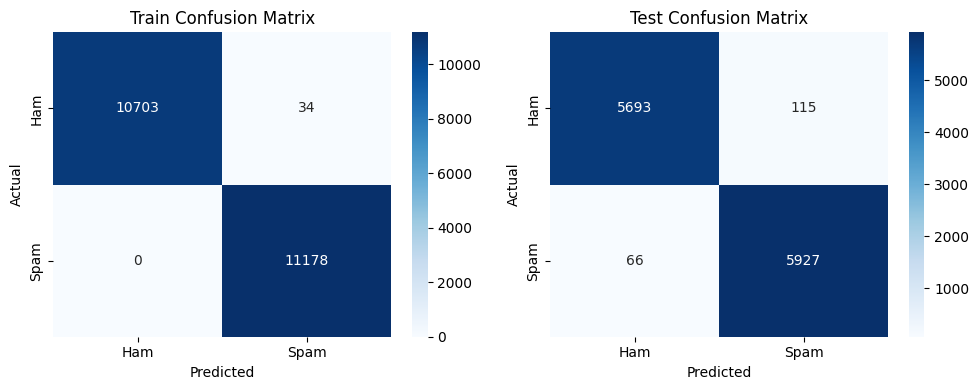

Test ROC AUC: 0.9973


In [ ]:
# ---------------------------
# 4. Evaluate on Train and Test
# ---------------------------
# (A) TRAIN
y_pred_train = rf_model.predict(X_train_tfidf)
train_acc = accuracy_score(y_train, y_pred_train)
train_cr_dict = classification_report(y_train, y_pred_train, output_dict=True)
train_cr_df = pd.DataFrame(train_cr_dict).T

# (B) TEST
y_pred_test = rf_model.predict(X_test_tfidf)
test_acc = accuracy_score(y_test, y_pred_test)
test_cr_dict = classification_report(y_test, y_pred_test, output_dict=True)
test_cr_df = pd.DataFrame(test_cr_dict).T

# Print train classification report in Markdown table format
print("Train Classification Report:")
print(train_cr_df.to_markdown())

# Print test classification report in Markdown table format
print("\nTest Classification Report:")
print(test_cr_df.to_markdown())

# Print accuracies
print(f"\nTrain Accuracy: {train_acc:.4f}")
print(f"Test Accuracy:  {test_acc:.4f}")

# Confusion Matrices
train_cm = confusion_matrix(y_train, y_pred_train)
test_cm  = confusion_matrix(y_test, y_pred_test)

# Plot side-by-side confusion matrices
plt.figure(figsize=(10,4))

# Train CM
plt.subplot(1,2,1)
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.title("Train Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

# Test CM
plt.subplot(1,2,2)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Ham','Spam'], yticklabels=['Ham','Spam'])
plt.title("Test Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

# (Optional) Print ROC AUC on test set
test_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test_tfidf)[:,1])
print(f"Test ROC AUC: {test_roc_auc:.4f}")

### **Save the Download the model**

In [ ]:

# ---------------------------
# 5. Save for Flask
# ---------------------------
with open("random_forest.pkl", "wb") as f:
    pickle.dump(rf_model, f)

with open("rf_vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf_vectorizer, f)

print("\nRandom Forest model and TF-IDF vectorizer saved to disk.")
files.download("rf_vectorizer.pkl")
files.download("random_forest.pkl")
print("Random Forest model and TF-IDF vectorizer downloaded to disk.")


Random Forest model and TF-IDF vectorizer saved to disk.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Random Forest model and TF-IDF vectorizer downloaded to disk.


## **Testing the Models**

In [ ]:
# --------------------------------------------------
# Load the Models and Preprocessors
# --------------------------------------------------
# Load Naïve Bayes model and TF-IDF vectorizer
nb_model = pickle.load(open("naive_bayes.pkl", "rb"))
vectorizer = pickle.load(open("vectorizer.pkl", "rb"))

# Load LSTM model and its tokenizer
lstm_model = tf.keras.models.load_model("lstm_model.h5")
lstm_tokenizer = pickle.load(open("lstm_tokenizer.pkl", "rb"))

# Load Random Forest model (assumed saved as random_forest.pkl)
rf_model = pickle.load(open("random_forest.pkl", "rb"))

# --------------------------------------------------
# Define Sample Emails
# --------------------------------------------------
spam_email = """Subject: URGENT: Claim Your Prize Now!
Dear Customer,
You have been selected as the lucky winner of our exclusive lottery. Please click the link below to claim your prize immediately.
http://www.claimyourprize.com
Best regards,
Prize Team"""

ham_email = """Subject: Meeting Reminder
Hi Team,
Just a reminder that we have a meeting tomorrow at 10 AM to discuss our quarterly targets.
Best,
Manager"""

# --------------------------------------------------
# Define Prediction Functions
# --------------------------------------------------
def predict_nb(email_text):
    email_text = email_text.strip().lower()
    vec = vectorizer.transform([email_text])
    pred = nb_model.predict(vec)[0]
    return "Spam" if pred == 1 else "Ham"

def predict_lstm(email_text, threshold=0.5):
    email_text = email_text.strip().lower()
    seq = lstm_tokenizer.texts_to_sequences([email_text])
    padded = pad_sequences(seq, maxlen=100)
    prob = lstm_model.predict(padded)[0][0]  # single probability value
    print(f"LSTM spam probability: {prob:.2f}")
    pred = 1 if prob >= threshold else 0
    return ("Spam" if pred == 1 else "Ham"), prob

def predict_rf(email_text):
    email_text = email_text.strip().lower()
    vec = vectorizer.transform([email_text])
    pred = rf_model.predict(vec)[0]
    return "Spam" if pred == 1 else "Ham"

# --------------------------------------------------
# Test the Models on Sample Emails
# --------------------------------------------------
print("Naïve Bayes Model Predictions:")
print("Spam Email Prediction: ", predict_nb(spam_email))
print("Ham Email Prediction:  ", predict_nb(ham_email))

print("\nLSTM Model Predictions (using threshold=0.5):")
pred_spam, prob_spam = predict_lstm(spam_email, threshold=0.5)
pred_ham, prob_ham   = predict_lstm(ham_email, threshold=0.5)
print("Spam Email Prediction: ", pred_spam, f"(Probability: {prob_spam:.2f})")
print("Ham Email Prediction:  ", pred_ham, f"(Probability: {prob_ham:.2f})")

print("\nRandom Forest Model Predictions:")
print("Spam Email Prediction: ", predict_rf(spam_email))
print("Ham Email Prediction:  ", predict_rf(ham_email))

Naïve Bayes Model Predictions:
Spam Email Prediction:  Spam
Ham Email Prediction:   Ham

LSTM Model Predictions (using threshold=0.5):
1/1 [==============================] - 1s 670ms/step
LSTM spam probability: 1.00
1/1 [==============================] - 0s 35ms/step
LSTM spam probability: 0.01
Spam Email Prediction:  Spam (Probability: 1.00)
Ham Email Prediction:   Ham (Probability: 0.01)

Random Forest Model Predictions:
Spam Email Prediction:  Spam
Ham Email Prediction:   Ham


# **THANK YOU!!**

Reference and Inspirations Is As Follows

https://github.com/5HU3HENDU/spam-random-forest

https://github.com/wsy1607/Spam-Email-Detection

https://github.com/Lanbig/spam-detection-tensorflow-lstm

https://github.com/nerdylabs/Mail-Spam-detection-using-NLP